# <u>Bank Marketing Dataset Model</u>

#  Steps in this Notebook :

- **[importing libraries](#section1)<br/>**

- **[Read Data](#section2)<br/>**

- **[Preprocessing](#section3)<br/>**

- **[Split Data](#section4)<br/>**

- **[Cross validation](#section5)<br/>**

- **[Feature Selection](#section6)<br/>**

- **[Hyper parameter tunning](#section7)<br/>**

- **[Model Selection](#section8)<br/>**

- **[Classification Metrics](#section9)<br/>**

- **[Save Model](#section10)<br/>**

- **[Improve recall](#section14)<br/>**

- **[Test Model](#section13)<br/>**

<a id=section1></a>
# importing libraries 

In [91]:
# filter warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas to read dataset 
import pandas as pd 
pd.set_option('display.max_columns',None)
import numpy as np

#visulaization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

# libraries to preprocessing and modeling
from category_encoders import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split ,RandomizedSearchCV
from imblearn.combine import SMOTETomek

<a id=section2></a>
# Read Data 

In [5]:
df = pd.read_csv('clean data.csv')
df.head()

age        job  marital        education  default housing loan    contact  \
0   56  housemaid  married  Basic education       no      no   no  telephone   
1   57   services  married      high.school  unknown      no   no  telephone   
2   37   services  married      high.school       no     yes   no  telephone   
3   40     admin.  married  Basic education       no      no   no  telephone   
4   56   services  married      high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1      0         0  nonexistent   
1   may         mon       149         1      0         0  nonexistent   
2   may         mon       226         1      0         0  nonexistent   
3   may         mon       151         1      0         0  nonexistent   
4   may         mon       307         1      0         0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  \
0           1.1          93.994          -36.4      4.857       5191.0  no   
1           1.1          93.994          -36.4      4.857       5191.0  no   
2           1.1          93.994          -36.4      4.857       5191.0  no   
3           1.1          93.994          -36.4      4.857       5191.0  no   
4           1.1          93.994          -36.4      4.857       5191.0  no   

    quarter age_group  
0  quarter2     50-59  
1  quarter2     50-59  
2  quarter2     30-39  
3  quarter2     40-49  
4  quarter2     50-59

<a id=section3></a>
# preprocessing

In [6]:
# covert values are unknown into nans to drop it 
df[df == 'unknown'] = np.nan

In [7]:
df.isnull().sum()

age                  0
job                328
marital             80
education         1717
default           8572
housing            988
loan               988
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
quarter              0
age_group            0
dtype: int64

In [8]:
# drop nans
df.dropna(inplace=True )
df.reset_index(drop=True , inplace=True)

In [9]:
df.shape

(30391, 23)

# Drop columns we don't need it 

In [10]:
df.drop(['duration', 'campaign' ,'poutcome'],axis=1,inplace=True)
df.sample(5)

age            job  marital            education default housing loan  \
1704    40       services   single          high.school      no     yes   no   
7471    56  self-employed  married  professional.course      no      no  yes   
28512   47         admin.  married    university.degree      no     yes  yes   
29371   37         admin.   single          high.school      no      no   no   
1502    37       services  married          high.school      no     yes   no   

         contact month day_of_week  pdays  previous  emp_var_rate  \
1704   telephone   may         wed      0         0           1.1   
7471   telephone   jun         fri      0         0           1.4   
28512   cellular   dec         mon      0         0          -3.0   
29371  telephone   jul         thu      0         3          -1.7   
1502   telephone   may         tue      0         0           1.1   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y   quarter  \
1704           93.994          -36.4      4.859       5191.0  no  quarter2   
7471           94.465          -41.8      4.959       5228.1  no  quarter2   
28512          92.713          -33.0      0.717       5023.5  no  quarter4   
29371          94.215          -40.3      0.782       4991.6  no  quarter3   
1502           93.994          -36.4      4.856       5191.0  no  quarter2   

      age_group  
1704      40-49  
7471      50-59  
28512     40-49  
29371     30-39  
1502      30-39

In [11]:
df.shape

(30391, 20)

### Encoding to Target column 

In [12]:
df.y = (df.y == 'yes').astype(int)

In [13]:
df.y.value_counts()

0    26573
1     3818
Name: y, dtype: int64

<a id=section4></a>
# Split Data 

In [14]:
x , y = df.drop('y',axis=1) , df.y

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=7)

In [16]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (24312, 19)
y_train shape: (24312,)
x_test shape: (6079, 19)
y_test shape: (6079,)


### Encoding to columns 

In [17]:
col_enco = x_train.select_dtypes(include="O").columns.to_list()
col_enco

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'quarter',
 'age_group']

In [18]:
col_to_scal = x_train.select_dtypes(exclude="O").columns.to_list()
col_to_scal

['age',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [63]:
preprocessor = ColumnTransformer(transformers=
                            [('BE', BinaryEncoder(), ['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'age_group']),
                            ('scaler' , MinMaxScaler(),col_to_scal)],
                            remainder='passthrough')

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('Ada' ,AdaBoostClassifier()))

<a id=section5></a>
# Cross Validation 

In [21]:
for model in models:
    steps = []
    steps.append(('preprocessor', preprocessor))
    steps.append(('smoT', SMOTETomek()))
    steps.append((model))
    
    pipeline = Pipeline(steps=steps)
        
    result = cross_validate(pipeline , X =x_train,y= y_train, cv=5, scoring='f1',
                            return_train_score=True)
    
    print(f"{model[0]} Train score is {result['train_score'].mean()}")
    print(f"{model[0]} Test score is {result['test_score'].mean()}")
    print('-'*50)

LR Train score is 0.46750934220549467
LR Test score is 0.466826840450682
--------------------------------------------------
KNN Train score is 0.6069526855920129
KNN Test score is 0.36275280573892554
--------------------------------------------------
DT Train score is 0.8971950890679334
DT Test score is 0.35322561218718906
--------------------------------------------------
RF Train score is 0.8995557720821628
RF Test score is 0.4170099318019703
--------------------------------------------------
XGBC Train score is 0.621614678534008
XGBC Test score is 0.4121205668389476
--------------------------------------------------
Ada Train score is 0.4759046524612973
Ada Test score is 0.4718962856993941
--------------------------------------------------


- I will do Hyper Parameter Tuning with RF and XGBC

<a id=section6></a>
# Feature Selection 

In [24]:
# Encoder & Scaler
x_train_p =pipeline[0].fit_transform(x_train)

In [25]:
# Resamble Data
x_train_R , y_train_R = pipeline[1].fit_resample(x_train_p,y_train)

In [26]:
# Data after preprocessing
prep_df  = pd.DataFrame(x_train_R ,columns=pipeline[:-1].get_feature_names_out())

In [27]:
# use RandomForestClassifier model to feature importance 
rf = RandomForestClassifier()
rf.fit(x_train_R , y_train_R)

RandomForestClassifier()

In [28]:
fe_importance = rf.feature_importances_

In [29]:
# save names of columns
column_names = prep_df.columns

In [31]:
# sort index
sorted_indices = np.argsort(fe_importance)

In [32]:
# sort names
sorted_column_names = column_names[sorted_indices]

In [33]:
sorted_importance = fe_importance[sorted_indices] 

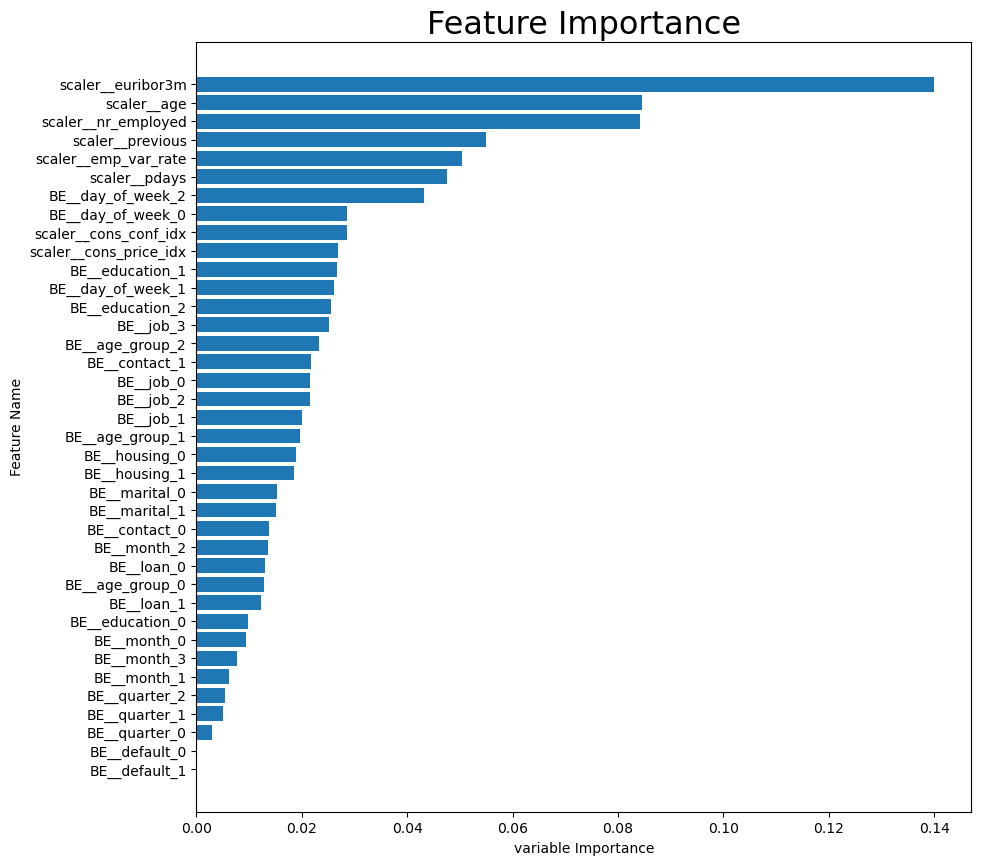

In [36]:
# bar plot to show feature importance
plt.figure(figsize=(10, 10))
plt.barh(y= sorted_column_names , width= sorted_importance)
plt.ylabel('Feature Name')
plt.xlabel('variable Importance')
plt.title('Feature Importance', fontsize=23)
plt.show()

- __Note1:__ euribor3m is the most important feature in data
- __Note2:__ Although default and quarter columns is an unimportant so i will drop it 

In [ ]:
# drop column 
x_train.drop(['default' , 'quarter'],axis = 1 ,inplace=True)

<a id=section7></a>
# Hyper Parameter Tuning

**In this process i will do fro :**

1) [**Random Forest Classifier**](#section11)</br>
2) [**XGBClassifier**](#section12)</br>

<a id=section11></a>
## Random Forest Classifier Model

In [37]:
# intailization Model 
steps = []
steps.append(('preprocessor', preprocessor))
steps.append(('smoT', SMOTETomek()))
steps.append(('RF', RandomForestClassifier()))

pipeline = Pipeline(steps=steps)

result_rf = cross_validate(pipeline , X =x_train,y= y_train, cv=5, scoring='f1',
                        return_train_score=True)

In [38]:
print(f" intailization RF Train score is {result_rf['train_score'].mean()}")
print(f" intailization RF Test score is {result_rf['test_score'].mean()}")

 intailization RF Train score is 0.901018532485609
 intailization RF Test score is 0.4208666351057876


In [46]:
pipeline[-1]

RandomForestClassifier()

In [47]:
parmas = {
    'RF__n_estimators' : [50,100, 150],
    'RF__criterion' : ['gini', 'entropy', 'log_loss'],
    'RF__max_depth': [None, 10, 20],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__max_features': ['log2', 'sqrt'],
    'RF__bootstrap': [True, False]
}

In [48]:
grid = GridSearchCV(estimator=pipeline ,param_grid=parmas,cv=5,verbose=3,scoring='f1',return_train_score=True,error_score='raise' )


In [49]:
# fit grid search with hyperparameter 
grid.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.894, test=0.411) total time=   5.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.901, test=0.434) total time=   4.9s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.897, test=0.404) total time=   5.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.905, test=0.431) total time=   4.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_dep

[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.732, test=0.482) total time=   7.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.733, test=0.458) total time=   7.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.727, test=0.457) total time=  10.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.731, test=0.453) total time=  10.9s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, 

[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.701, test=0.473) total time=   4.9s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.696, test=0.454) total time=   4.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.699, test=0.469) total time=   5.0s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.703, test=0.475) total time=   4.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__

[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.662, test=0.492) total time=   7.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.675, test=0.473) total time=   9.4s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.661, test=0.483) total time=   9.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.670, test=0.486) total time=   9.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__

[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.810, test=0.430) total time=   5.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.816, test=0.454) total time=   5.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.813, test=0.427) total time=   5.3s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.813, test=0.441) total time=   8.4s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min

[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.768, test=0.454) total time=  11.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.778, test=0.454) total time=  11.2s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.769, test=0.448) total time=  11.3s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.775, test=0.465) total time=  11.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__

[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.671, test=0.487) total time=   5.0s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.678, test=0.481) total time=   5.3s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.677, test=0.474) total time=   7.9s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.671, test=0.475) total time=   8.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__mi

[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.665, test=0.482) total time=  11.2s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.672, test=0.471) total time=  10.3s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.668, test=0.494) total time=  10.3s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.665, test=0.489) total time=  10.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF

[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.552, test=0.511) total time=   3.8s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.503) total time=   5.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.558, test=0.514) total time=   5.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.556, test=0.518) total time=   5.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_sam

[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.552, test=0.516) total time=   8.0s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.555, test=0.525) total time=   7.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.558, test=0.522) total time=   8.3s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.553, test=0.512) total time=   4.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_sample

[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.549, test=0.507) total time=   5.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.553, test=0.512) total time=   5.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.550, test=0.514) total time=   5.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.551, test=0.518) total time=   5.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_sample

[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.565, test=0.524) total time=   8.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.565, test=0.510) total time=   9.2s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.565, test=0.504) total time=   4.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.565, test=0.508) total time=   4.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_

[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.566, test=0.510) total time=   6.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.563, test=0.513) total time=   6.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.565, test=0.523) total time=   6.6s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.562, test=0.514) total time=   6.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_sample

[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.558, test=0.512) total time=   8.7s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.554, test=0.506) total time=   4.4s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.556, test=0.505) total time=   4.3s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.553, test=0.513) total time=   4.2s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_

[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.514) total time=   5.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.553, test=0.518) total time=   4.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.516) total time=   4.9s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.557, test=0.505) total time=   7.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_sa

[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.717, test=0.454) total time=   3.5s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.714, test=0.452) total time=   3.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.713, test=0.451) total time=   3.5s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.717, test=0.489) total time=   3.6s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_sample

[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.747, test=0.474) total time=   5.6s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.739, test=0.464) total time=   5.7s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.741, test=0.466) total time=   8.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.740, test=0.457) total time=   7.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_sample

[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.662, test=0.483) total time=   3.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.665, test=0.472) total time=   3.0s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.663, test=0.505) total time=   3.0s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.658, test=0.496) total time=   3.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_sp

[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.869, test=0.415) total time=   6.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.870, test=0.420) total time=   8.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.870, test=0.430) total time=   9.0s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.866, test=0.429) total time=   9.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_sample

[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.755, test=0.433) total time=   3.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.755, test=0.460) total time=   3.4s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.755, test=0.458) total time=   3.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.757, test=0.462) total time=   5.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_s

[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.701, test=0.462) total time=   7.9s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.698, test=0.459) total time=   7.9s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.699, test=0.454) total time=   8.0s
[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.697, test=0.483) total time=   8.2s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_sa

[CV 4/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.660, test=0.492) total time=   3.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.662, test=0.482) total time=   3.7s
[CV 1/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.670, test=0.473) total time=   5.9s
[CV 2/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.664, test=0.470) total time=   5.8s
[CV 3/5] END RF__bootstrap=True, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samp

[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.817, test=0.438) total time=   8.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.816, test=0.431) total time=   8.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.820, test=0.441) total time=   8.3s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.822, test=0.438) total time=   8.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_sampl

[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.757, test=0.457) total time=   3.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.754, test=0.463) total time=   3.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.750, test=0.458) total time=   6.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.762, test=0.460) total time=   5.8s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples

[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.673, test=0.471) total time=   7.5s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.668, test=0.475) total time=   7.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.672, test=0.478) total time=   7.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.674, test=0.483) total time=   7.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_sampl

[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.897, test=0.394) total time=   3.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.902, test=0.426) total time=   3.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.903, test=0.387) total time=   3.8s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.895, test=0.422) total time=   6.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_

[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.732, test=0.448) total time=   6.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.729, test=0.453) total time=   8.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.732, test=0.453) total time=   8.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.729, test=0.447) total time=   8.7s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_s

[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.707, test=0.466) total time=   3.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.708, test=0.457) total time=   3.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.714, test=0.478) total time=   3.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.711, test=0.464) total time=   3.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_sampl

[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.680, test=0.487) total time=   5.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.677, test=0.484) total time=   5.7s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.682, test=0.461) total time=   8.1s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.680, test=0.472) total time=   8.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_sampl

[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.553, test=0.508) total time=   2.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.551, test=0.514) total time=   2.5s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.550, test=0.516) total time=   2.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.550, test=0.515) total time=   2.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF_

[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.555, test=0.518) total time=   4.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.552, test=0.508) total time=   6.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.556, test=0.509) total time=   6.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.550, test=0.515) total time=   6.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2,

[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.545, test=0.518) total time=   2.7s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.550, test=0.512) total time=   2.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.546, test=0.519) total time=   2.8s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.549, test=0.509) total time=   4.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF

[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.546, test=0.505) total time=   6.1s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.547, test=0.510) total time=   6.0s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.542, test=0.516) total time=   5.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.548, test=0.519) total time=   6.0s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_lea

[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.554, test=0.521) total time=   2.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.555, test=0.509) total time=   3.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.556, test=0.500) total time=   4.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.512) total time=   4.8s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=

[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.555, test=0.508) total time=   6.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.554, test=0.514) total time=   6.5s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.556, test=0.522) total time=   6.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.557, test=0.517) total time=   6.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2,

[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.551, test=0.511) total time=   2.9s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.547, test=0.497) total time=   4.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.552, test=0.512) total time=   4.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.552, test=0.513) total time=   4.9s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, 

[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.864, test=0.418) total time=   8.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.867, test=0.454) total time=   8.9s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.860, test=0.433) total time=   9.1s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.780, test=0.442) total time=   3.5s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, 

[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.750, test=0.450) total time=   5.5s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.753, test=0.454) total time=   5.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.745, test=0.448) total time=   5.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.751, test=0.475) total time=   5.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2,

[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.693, test=0.486) total time=   7.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.698, test=0.479) total time=   8.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.660, test=0.473) total time=   3.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.658, test=0.486) total time=   3.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4,

[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.658, test=0.488) total time=   5.3s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.660, test=0.476) total time=   5.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.659, test=0.493) total time=   5.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.659, test=0.489) total time=   5.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_lea

[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.782, test=0.441) total time=   9.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.711, test=0.450) total time=   3.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.712, test=0.454) total time=   3.5s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.714, test=0.447) total time=   3.7s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1,

[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.745, test=0.450) total time=   6.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.752, test=0.466) total time=   6.0s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.751, test=0.457) total time=   6.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.746, test=0.452) total time=   8.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2,

[CV 1/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.674, test=0.466) total time=   3.4s
[CV 2/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.673, test=0.478) total time=   3.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.680, test=0.457) total time=   3.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.677, test=0.493) total time=   3.4s
[CV 5/5] END RF__bootstrap=True, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF_

[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.901, test=0.437) total time=   6.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.902, test=0.408) total time=   6.0s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.898, test=0.433) total time=   8.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.900, test=0.424) total time=   8.9s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_

[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.762, test=0.455) total time=   3.3s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.763, test=0.465) total time=   3.3s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.761, test=0.444) total time=   3.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.763, test=0.470) total time=   3.3s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samp

[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.705, test=0.466) total time=   5.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.705, test=0.479) total time=   5.4s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.708, test=0.468) total time=   5.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.706, test=0.467) total time=   7.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__

[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.671, test=0.484) total time=   7.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.666, test=0.476) total time=   3.1s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.657, test=0.481) total time=   3.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.660, test=0.485) total time=   3.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_

[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.815, test=0.438) total time=   6.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.812, test=0.413) total time=   6.5s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.824, test=0.448) total time=   6.4s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.819, test=0.434) total time=   6.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_

[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.775, test=0.456) total time=   8.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.778, test=0.446) total time=   8.9s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.763, test=0.445) total time=   3.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.756, test=0.451) total time=   3.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_sa

[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.681, test=0.466) total time=   5.9s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.680, test=0.479) total time=   5.8s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.681, test=0.471) total time=   5.9s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.683, test=0.486) total time=   5.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_

[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.678, test=0.474) total time=   8.3s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.676, test=0.491) total time=   8.2s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.673, test=0.474) total time=   8.2s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.553, test=0.502) total time=   2.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_sa

[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.506) total time=   4.1s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.551, test=0.509) total time=   4.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.548, test=0.517) total time=   4.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.551, test=0.523) total time=   4.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_sample

[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.552, test=0.519) total time=   5.7s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.552, test=0.515) total time=   5.7s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.549, test=0.508) total time=   2.6s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.548, test=0.508) total time=   2.6s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_le

[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.546, test=0.509) total time=   4.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.544, test=0.513) total time=   4.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.547, test=0.520) total time=   4.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.550, test=0.514) total time=   4.1s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_le

[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.557, test=0.517) total time=   6.3s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.558, test=0.497) total time=   2.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.561, test=0.507) total time=   2.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.556, test=0.519) total time=   2.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=

[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.555, test=0.509) total time=   4.6s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.558, test=0.524) total time=   4.6s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.559, test=0.513) total time=   4.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.557, test=0.497) total time=   6.5s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_le

[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.554, test=0.498) total time=   2.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.548, test=0.509) total time=   2.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.553, test=0.516) total time=   2.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.548, test=0.516) total time=   2.8s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4

[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.550, test=0.514) total time=   4.5s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.551, test=0.513) total time=   4.6s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.550, test=0.500) total time=   6.4s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.553, test=0.511) total time=   6.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_sample

[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.711, test=0.469) total time=   3.2s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.718, test=0.439) total time=   3.2s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.716, test=0.487) total time=   3.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.716, test=0.465) total time=   3.2s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_le

[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.744, test=0.468) total time=   5.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.741, test=0.455) total time=   7.7s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.742, test=0.458) total time=   7.7s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.740, test=0.454) total time=   7.7s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_le

[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.666, test=0.489) total time=   3.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.660, test=0.497) total time=   3.1s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.660, test=0.483) total time=   3.1s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.672, test=0.481) total time=   5.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=

[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.863, test=0.433) total time=   9.2s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.860, test=0.443) total time=   9.1s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.862, test=0.421) total time=   9.1s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.869, test=0.452) total time=   9.2s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_le

[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.757, test=0.465) total time=   3.6s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.754, test=0.460) total time=   3.5s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.757, test=0.449) total time=   6.0s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.758, test=0.444) total time=   6.0s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf

[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.698, test=0.461) total time=   8.4s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.699, test=0.460) total time=   8.4s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.706, test=0.485) total time=   8.4s
[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.703, test=0.469) total time=   8.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_sample

[CV 5/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.665, test=0.487) total time=   3.4s
[CV 1/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.670, test=0.477) total time=   5.8s
[CV 2/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.665, test=0.474) total time=   5.8s
[CV 3/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.669, test=0.461) total time=   5.8s
[CV 4/5] END RF__bootstrap=True, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples

[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.879, test=0.407) total time=   9.6s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.884, test=0.424) total time=   9.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.884, test=0.400) total time=   9.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.804, test=0.419) total time=   3.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1,

[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.824, test=0.422) total time=   6.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.824, test=0.439) total time=   6.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.824, test=0.426) total time=   6.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.826, test=0.450) total time=   6.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2,

[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.735, test=0.473) total time=   8.5s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.727, test=0.469) total time=   8.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.724, test=0.456) total time=   3.5s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.728, test=0.472) total time=   3.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, R

[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.897, test=0.390) total time=   7.7s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.895, test=0.382) total time=   7.7s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.898, test=0.422) total time=   7.7s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.899, test=0.392) total time=   7.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1,

[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.804, test=0.436) total time=  10.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.841, test=0.412) total time=   4.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.842, test=0.424) total time=   4.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.835, test=0.405) total time=   4.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, R

[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.771, test=0.428) total time=   6.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.776, test=0.460) total time=   6.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.782, test=0.443) total time=   6.8s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.772, test=0.433) total time=   9.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_lea

[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.726, test=0.443) total time=   3.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.737, test=0.453) total time=   3.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.732, test=0.453) total time=   3.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.741, test=0.474) total time=   3.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4,

[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.563, test=0.515) total time=   4.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.564, test=0.512) total time=   4.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.566, test=0.504) total time=   6.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.566, test=0.512) total time=   6.3s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_s

[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.563, test=0.503) total time=   2.7s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.563, test=0.514) total time=   2.7s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.562, test=0.526) total time=   2.7s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.564, test=0.512) total time=   2.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_sampl

[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.555, test=0.516) total time=   4.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.553, test=0.503) total time=   6.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.560, test=0.509) total time=   6.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.556, test=0.518) total time=   6.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_s

[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.568, test=0.516) total time=   3.0s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.570, test=0.515) total time=   3.0s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.578, test=0.513) total time=   3.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.566, test=0.498) total time=   5.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samp

[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.560, test=0.501) total time=   7.2s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.568, test=0.512) total time=   7.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.562, test=0.517) total time=   7.0s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.564, test=0.521) total time=   7.1s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__m

[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.562, test=0.525) total time=   3.1s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.570, test=0.509) total time=   3.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.563, test=0.499) total time=   5.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.562, test=0.515) total time=   5.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min

[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.564, test=0.506) total time=   7.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.564, test=0.512) total time=   7.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.562, test=0.517) total time=   7.1s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.565, test=0.516) total time=   7.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_s

[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.839, test=0.413) total time=   3.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.850, test=0.408) total time=   6.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.842, test=0.416) total time=   6.4s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.838, test=0.408) total time=   6.3s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_sa

[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.807, test=0.419) total time=   8.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.814, test=0.453) total time=   8.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.809, test=0.440) total time=   8.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.801, test=0.432) total time=   3.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_sa

[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.719, test=0.450) total time=   6.0s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.725, test=0.457) total time=   6.1s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.729, test=0.450) total time=   6.0s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.723, test=0.481) total time=   5.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_s

[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.717, test=0.476) total time=   8.2s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.721, test=0.470) total time=   8.2s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.884, test=0.403) total time=   4.2s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.882, test=0.404) total time=   4.1s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_s

[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.791, test=0.446) total time=   6.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.786, test=0.431) total time=   6.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.790, test=0.456) total time=   6.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.784, test=0.441) total time=   6.8s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__m

[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.803, test=0.428) total time=   9.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.760, test=0.442) total time=   3.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.764, test=0.447) total time=   3.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.755, test=0.434) total time=   3.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_s

[CV 3/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.732, test=0.451) total time=   6.7s
[CV 4/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.738, test=0.477) total time=   6.6s
[CV 5/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.742, test=0.459) total time=   6.8s
[CV 1/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.726, test=0.455) total time=   9.4s
[CV 2/5] END RF__bootstrap=False, RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_s

[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.877, test=0.422) total time=   4.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.876, test=0.424) total time=   4.1s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.879, test=0.395) total time=   4.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.881, test=0.432) total time=   4.1s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samp

[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.837, test=0.404) total time=   7.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.840, test=0.442) total time=   6.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.837, test=0.417) total time=   7.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.835, test=0.427) total time=   9.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_

[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.773, test=0.441) total time=   9.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.738, test=0.457) total time=   3.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.735, test=0.459) total time=   3.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.733, test=0.449) total time=   3.8s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_sa

[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.733, test=0.464) total time=   6.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.732, test=0.452) total time=   6.5s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.734, test=0.474) total time=   6.5s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.732, test=0.471) total time=   6.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=log2, RF__

[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.886, test=0.412) total time=  11.6s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.884, test=0.402) total time=  11.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.805, test=0.432) total time=   4.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.808, test=0.436) total time=   4.3s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_

[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.830, test=0.426) total time=   7.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.831, test=0.431) total time=   7.7s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.828, test=0.417) total time=   7.7s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.836, test=0.433) total time=   7.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_

[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.748, test=0.436) total time=  10.5s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.754, test=0.477) total time=  10.6s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.752, test=0.455) total time=  10.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.745, test=0.441) total time=   4.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=None, RF__max_features=sqrt, RF__min_s

[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.560, test=0.508) total time=   2.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.556, test=0.506) total time=   4.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.564, test=0.504) total time=   4.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.557, test=0.517) total time=   5.0s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_lea

[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.551, test=0.518) total time=   6.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.557, test=0.522) total time=   6.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.555, test=0.511) total time=   7.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.560, test=0.507) total time=   2.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_

[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.555, test=0.506) total time=   4.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.555, test=0.510) total time=   4.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.552, test=0.518) total time=   4.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.558, test=0.520) total time=   4.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_sample

[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.550, test=0.518) total time=   6.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.553, test=0.515) total time=   6.8s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.549, test=0.506) total time=   2.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.552, test=0.505) total time=   2.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_le

[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.562, test=0.507) total time=   5.4s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.560, test=0.510) total time=   5.5s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.560, test=0.523) total time=   5.5s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.562, test=0.516) total time=   5.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_le

[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.564, test=0.515) total time=   7.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.562, test=0.499) total time=   3.2s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.565, test=0.507) total time=   3.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.557, test=0.510) total time=   3.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=

[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.553, test=0.512) total time=   5.5s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.555, test=0.517) total time=   5.5s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.560, test=0.515) total time=   5.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.554, test=0.502) total time=   7.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_le

[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.874, test=0.426) total time=   4.2s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.869, test=0.409) total time=   4.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.875, test=0.394) total time=   4.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.881, test=0.420) total time=   4.0s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1

[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.787, test=0.461) total time=   6.7s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.783, test=0.439) total time=   6.6s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.782, test=0.424) total time=   9.5s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.782, test=0.442) total time=   9.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_sample

[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.762, test=0.444) total time=   3.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.755, test=0.444) total time=   3.8s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.761, test=0.469) total time=   3.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.755, test=0.455) total time=   4.1s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_le

[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.724, test=0.457) total time=   6.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.725, test=0.454) total time=   9.2s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.724, test=0.454) total time=   9.1s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.730, test=0.448) total time=   9.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=log2, RF__min_samples_le

[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.833, test=0.406) total time=   4.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.846, test=0.435) total time=   4.3s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.839, test=0.413) total time=   4.2s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.844, test=0.422) total time=   7.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=

[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.812, test=0.429) total time=  10.8s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.806, test=0.437) total time=  10.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.804, test=0.420) total time=  10.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.814, test=0.456) total time=  10.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_le

[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.733, test=0.471) total time=   4.1s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.730, test=0.458) total time=   4.1s
[CV 1/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.726, test=0.445) total time=   7.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.735, test=0.458) total time=   7.3s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf

[CV 2/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.727, test=0.456) total time=  10.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.725, test=0.439) total time=  10.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.741, test=0.477) total time=  10.2s
[CV 5/5] END RF__bootstrap=False, RF__criterion=entropy, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.727, test=0.446) total time=  10.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_sam

[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.812, test=0.446) total time=   3.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.809, test=0.418) total time=   3.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.803, test=0.428) total time=   7.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.808, test=0.438) total time=   6.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, R

[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.827, test=0.426) total time=   9.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.827, test=0.440) total time=   9.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.824, test=0.427) total time=   9.8s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.829, test=0.451) total time=  10.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF_

[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.737, test=0.460) total time=   5.6s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.738, test=0.465) total time=   5.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.736, test=0.464) total time=   5.6s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.738, test=0.448) total time=   9.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=log2, RF__mi

[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.898, test=0.386) total time=  11.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.891, test=0.391) total time=  16.1s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.895, test=0.399) total time=  16.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.896, test=0.400) total time=  16.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF_

[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.839, test=0.430) total time=   6.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.838, test=0.421) total time=   6.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.843, test=0.444) total time=   7.2s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.838, test=0.410) total time=   6.6s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min

[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.782, test=0.456) total time=  11.2s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.782, test=0.429) total time=  11.6s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.774, test=0.433) total time=  16.4s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.782, test=0.444) total time=  15.5s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt,

[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.736, test=0.446) total time=   6.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.737, test=0.447) total time=   6.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.734, test=0.432) total time=   7.0s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.736, test=0.469) total time=   6.9s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=None, RF__max_features=sqrt, RF_

[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.556, test=0.517) total time=   7.7s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.558, test=0.517) total time=   8.2s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.559, test=0.514) total time=   8.0s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.558, test=0.503) total time=   9.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_sampl

[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.558, test=0.508) total time=  11.2s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.555, test=0.504) total time=   4.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.560, test=0.508) total time=   4.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.554, test=0.515) total time=   5.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_

[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.549, test=0.510) total time=   7.7s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.547, test=0.518) total time=   7.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.553, test=0.521) total time=   7.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.552, test=0.513) total time=   8.1s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_sampl

[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.553, test=0.519) total time=  10.4s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.553, test=0.510) total time=  10.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.560, test=0.503) total time=   5.3s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.565, test=0.511) total time=   5.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_sampl

[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.558, test=0.499) total time=   6.0s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.561, test=0.505) total time=   6.3s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.558, test=0.511) total time=   6.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.559, test=0.519) total time=   6.0s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_s

[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.559, test=0.513) total time=   8.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.560, test=0.515) total time=   8.3s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.566, test=0.517) total time=   7.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.558, test=0.498) total time=   3.5s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_sampl

[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.556, test=0.512) total time=   3.4s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.555, test=0.502) total time=   5.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.553, test=0.514) total time=   5.9s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.560, test=0.518) total time=   5.9s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=10, RF__max_features=sqrt, RF__min_sample

[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.872, test=0.417) total time=  11.2s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.877, test=0.401) total time=  11.1s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.881, test=0.425) total time=  10.7s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=1, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.879, test=0.409) total time=  10.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_sampl

[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.809, test=0.456) total time=   4.0s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=50;, score=(train=0.799, test=0.422) total time=   3.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.805, test=0.438) total time=   6.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.804, test=0.444) total time=   7.0s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples

[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.754, test=0.439) total time=   9.6s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.760, test=0.446) total time=   9.6s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.757, test=0.434) total time=   9.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=2, RF__min_samples_split=10, RF__n_estimators=150;, score=(train=0.761, test=0.473) total time=   9.5s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_s

[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.716, test=0.454) total time=   4.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.722, test=0.471) total time=   3.8s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=50;, score=(train=0.715, test=0.468) total time=   3.9s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samples_leaf=4, RF__min_samples_split=10, RF__n_estimators=100;, score=(train=0.716, test=0.459) total time=   6.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=log2, RF__min_samp

[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=100;, score=(train=0.843, test=0.424) total time=   7.5s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.842, test=0.417) total time=  10.9s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.835, test=0.434) total time=  10.8s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=1, RF__min_samples_split=5, RF__n_estimators=150;, score=(train=0.840, test=0.402) total time=  11.4s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_sampl

[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.803, test=0.435) total time=   4.3s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.801, test=0.422) total time=   4.2s
[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.808, test=0.451) total time=   4.3s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=2, RF__min_samples_split=5, RF__n_estimators=50;, score=(train=0.805, test=0.435) total time=   4.2s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_l

[CV 4/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.739, test=0.469) total time=   7.7s
[CV 5/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=100;, score=(train=0.737, test=0.462) total time=   7.7s
[CV 1/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.727, test=0.449) total time=  10.7s
[CV 2/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_leaf=4, RF__min_samples_split=2, RF__n_estimators=150;, score=(train=0.736, test=0.451) total time=  11.4s
[CV 3/5] END RF__bootstrap=False, RF__criterion=log_loss, RF__max_depth=20, RF__max_features=sqrt, RF__min_sampl

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('BE',
                                                                         BinaryEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'quarter',
                                                                          'age_group']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'cons_price_id...
                                       ('smoT', SMOTETomek()),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__criterion': ['gini', 'entropy', 'log_loss'],
                         'RF__max_depth': [None, 10, 20],
                         'RF__max_features': ['log2', 'sqrt'],
                         'RF__min_samples_leaf': [1, 2, 4],
                         'RF__min_samples_split': [2, 5, 10],
                         'RF__n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='f1', verbose=3)

In [50]:
# get best parameters
grid.best_params_

{'RF__bootstrap': False,
 'RF__criterion': 'entropy',
 'RF__max_depth': 10,
 'RF__max_features': 'log2',
 'RF__min_samples_leaf': 4,
 'RF__min_samples_split': 5,
 'RF__n_estimators': 50}

In [51]:
# max train score 
grid.cv_results_["mean_train_score"].max()

0.9014708698756564

In [52]:
# max test score 
grid.cv_results_["mean_test_score"].max()

0.5156321590771331

<a id=section12></a>
## XGBClassifier

In [64]:
# second Model 
steps = []
steps.append(('preprocessor', preprocessor))
steps.append(('smoT', SMOTETomek()))
steps.append(('XGBC', XGBClassifier()))

pipeline = Pipeline(steps=steps)

result_xg = cross_validate(pipeline , X =x_train,y= y_train, cv=5, scoring='f1',
                        return_train_score=True)

In [65]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week',
                                                   'age_group']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['age', 'pdays', 'previous',
                                                   'emp_var_rate',
                                                   'cons_price_idx',
                                                   'cons_conf_idx', 'euribor3m',
                                                   'nr_employed'])])),
                ('smoT', SMOTETomek...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [66]:
print(f" xgb Train score is {result_xg['train_score'].mean()}")
print(f" xgb Test score is {result_xg['test_score'].mean()}")

 xgb Train score is 0.6192602630323465
 xgb Test score is 0.4027219988706891


In [67]:
parameters = {

    
    'XGBC__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'XGBC__subsample':[i/10.0 for i in range(6,10)],
    'XGBC__colsample_bytree':[i/10.0 for i in range(6,10)],
    'XGBC__gamma':[i/10.0 for i in range(0,5)],
    'XGBC__max_depth': range(3,10,2) ,
    'XGBC__min_child_weight' : range(1,6,2)

             }


In [68]:
# here i will use random search
grid2 = RandomizedSearchCV(estimator=pipeline, param_distributions=parameters ,
                          cv = 5,verbose=3,return_train_score=True)

In [69]:
grid2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END XGBC__colsample_bytree=0.7, XGBC__gamma=0.0, XGBC__max_depth=5, XGBC__min_child_weight=5, XGBC__reg_alpha=0.01, XGBC__subsample=0.6;, score=(train=0.908, test=0.883) total time=   1.7s
[CV 2/5] END XGBC__colsample_bytree=0.7, XGBC__gamma=0.0, XGBC__max_depth=5, XGBC__min_child_weight=5, XGBC__reg_alpha=0.01, XGBC__subsample=0.6;, score=(train=0.907, test=0.882) total time=   1.7s
[CV 3/5] END XGBC__colsample_bytree=0.7, XGBC__gamma=0.0, XGBC__max_depth=5, XGBC__min_child_weight=5, XGBC__reg_alpha=0.01, XGBC__subsample=0.6;, score=(train=0.906, test=0.876) total time=   1.8s
[CV 4/5] END XGBC__colsample_bytree=0.7, XGBC__gamma=0.0, XGBC__max_depth=5, XGBC__min_child_weight=5, XGBC__reg_alpha=0.01, XGBC__subsample=0.6;, score=(train=0.906, test=0.881) total time=   1.7s
[CV 5/5] END XGBC__colsample_bytree=0.7, XGBC__gamma=0.0, XGBC__max_depth=5, XGBC__min_child_weight=5, XGBC__reg_alpha=0.01, XGBC__subsample=0.6;, 

[CV 3/5] END XGBC__colsample_bytree=0.8, XGBC__gamma=0.1, XGBC__max_depth=5, XGBC__min_child_weight=3, XGBC__reg_alpha=100, XGBC__subsample=0.7;, score=(train=0.875, test=0.877) total time=   1.7s
[CV 4/5] END XGBC__colsample_bytree=0.8, XGBC__gamma=0.1, XGBC__max_depth=5, XGBC__min_child_weight=3, XGBC__reg_alpha=100, XGBC__subsample=0.7;, score=(train=0.877, test=0.870) total time=   1.8s
[CV 5/5] END XGBC__colsample_bytree=0.8, XGBC__gamma=0.1, XGBC__max_depth=5, XGBC__min_child_weight=3, XGBC__reg_alpha=100, XGBC__subsample=0.7;, score=(train=0.875, test=0.873) total time=   2.1s
[CV 1/5] END XGBC__colsample_bytree=0.8, XGBC__gamma=0.2, XGBC__max_depth=7, XGBC__min_child_weight=3, XGBC__reg_alpha=0.01, XGBC__subsample=0.8;, score=(train=0.930, test=0.879) total time=   2.2s
[CV 2/5] END XGBC__colsample_bytree=0.8, XGBC__gamma=0.2, XGBC__max_depth=7, XGBC__min_child_weight=3, XGBC__reg_alpha=0.01, XGBC__subsample=0.8;, score=(train=0.931, test=0.877) total time=   2.5s
[CV 3/5] END 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('BE',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'marital',
                                                                                'education',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'day_of_week',
                                                                                'age_group']),
                                                                              ('scaler',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp_var_rate',
                                                                                'cons_price_idx',
                                                                                'cons_conf_idx',
                                                                                'euribor3m',
                                                                                'nr...
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   param_distributions={'XGBC__colsample_bytree': [0.6, 0.7,
                                                                   0.8, 0.9],
                                        'XGBC__gamma': [0.0, 0.1, 0.2, 0.3,
                                                        0.4],
                                        'XGBC__max_depth': range(3, 10, 2),
                                        'XGBC__min_child_weight': range(1, 6, 2),
                                        'XGBC__reg_alpha': [1e-05, 0.01, 0.1, 1,
                                                            100],
                                        'XGBC__subsample': [0.6, 0.7, 0.8,
                                                            0.9]},
                   return_train_score=True, verbose=3)

In [70]:
# get best parameters
grid2.best_params_

{'XGBC__subsample': 0.7,
 'XGBC__reg_alpha': 1,
 'XGBC__min_child_weight': 1,
 'XGBC__max_depth': 3,
 'XGBC__gamma': 0.1,
 'XGBC__colsample_bytree': 0.9}

In [71]:
# max train score 
grid2.cv_results_["mean_train_score"].max()

0.947834399664484

In [72]:
# max test score 
grid2.cv_results_["mean_test_score"].max()

0.8854476498087921

**After tuning for XGBC and RF i will seleect XGBC**

<a id=section8></a>
# Model Selection 

In [76]:
steps = []
steps.append(('preprocessor', preprocessor))
steps.append(('smoT', SMOTETomek()))
steps.append(('XGBC', XGBClassifier(subsample = 0.7 , reg_alpha =1,
                     min_child_weight = 1 , max_depth = 3 ,
                     gamma = 0.1 , colsample_bytree = 0.,
                     n_estimators=100)))

pipeline = Pipeline(steps=steps)

In [77]:
pipeline.fit(x_train , y_train )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week',
                                                   'age_group']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['age', 'pdays', 'previous',
                                                   'emp_var_rate',
                                                   'cons_price_idx',
                                                   'cons_conf_idx', 'euribor3m',
                                                   'nr_employed'])])),
                ('smoT', SMOTETomek...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

<a id=section9></a>
# Classification Metrics

In [78]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5315
           1       0.53      0.40      0.46       764

    accuracy                           0.88      6079
   macro avg       0.72      0.68      0.70      6079
weighted avg       0.87      0.88      0.87      6079



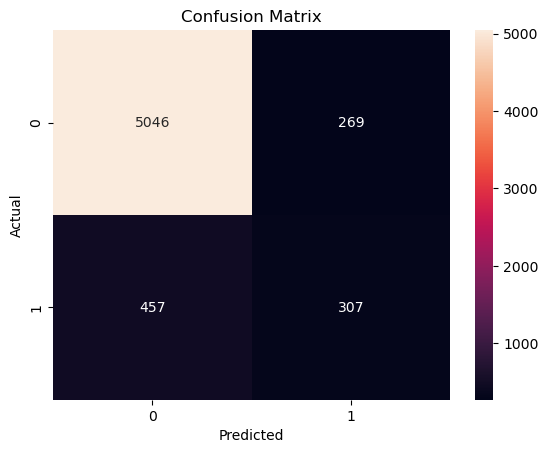

In [83]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True,fmt='0.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [86]:
from sklearn.metrics import precision_recall_curve


y_train_prob=pipeline.predict_proba(x_train)
y_test_prob=pipeline.predict_proba(x_test)

precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_prob[:,1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_prob[:,1])

In [87]:
# shape for precision & recall & thresholds
print(f"shape of precision train = {precision_train.shape}")
print(f"shape of recall train = {recall_train.shape}")
print(f"shape of thresholds train = {thresholds_train.shape}")

print('-'*50)

print(f"shape of precision test = {precision_test.shape}")
print(f"shape of recall test = {recall_test.shape}")
print(f"shape of thresholds test = {thresholds_test.shape}")

shape of precision train = (17820,)
shape of recall train = (17820,)
shape of thresholds train = (17819,)
--------------------------------------------------
shape of precision test = (5459,)
shape of recall test = (5459,)
shape of thresholds test = (5458,)


In [89]:
# Datafram
df_precision_recall_train= pd.DataFrame({'Threshold': thresholds_train,
                                  'Precision': precision_train[:-1],
                                  'Recall': recall_train[:-1]})
df_precision_recall_train.head()

Threshold  Precision  Recall
0   0.025118   0.125617     1.0
1   0.029171   0.125622     1.0
2   0.029452   0.125627     1.0
3   0.029762   0.125632     1.0
4   0.030498   0.125638     1.0

In [97]:
px.line(df_precision_recall_train, x='Recall', y='Precision',hover_data = ['Threshold'], title='Precision recall curve for train ')

In [101]:
df_precision_recall_test=pd.DataFrame({"precision":precision_test[:-1],
                           "recall":recall_test[:-1],
                            "thresholds":thresholds_test})
df_precision_recall_test.head()

precision  recall  thresholds
0   0.125679     1.0    0.029093
1   0.125699     1.0    0.032695
2   0.125720     1.0    0.034515
3   0.125741     1.0    0.035109
4   0.125761     1.0    0.037341

In [99]:
px.line(df_precision_recall_test, x='recall', y='precision',hover_data = ['thresholds'], title='Precision recall curve for test ')

**threshold = 0.13 to get recall = 84**

<a id=section10></a>
# Save Model

In [102]:
import pickle
pickle.dump(pipeline,open("model.pkl","wb"))

In [103]:
pickle.dump(x_train.columns,open('inputs.pkl','wb'))

<a id=section14></a>
# Improve recall

In [167]:
def thresholed(y_prob):
    if y_prob >= 0.13 :
        return 1  
    else :
        return 0 

In [168]:
v_da = np.vectorize(thresholed)
y_train_thresh2 = v_da(model.predict_proba(x_train)[:,1])
y_test_thresh2 = v_da(model.predict_proba(x_test)[:,1])

In [169]:
y_train_thresh2

array([1, 0, 0, ..., 0, 0, 0])

In [170]:
y_test_thresh2

array([0, 1, 1, ..., 1, 0, 1])

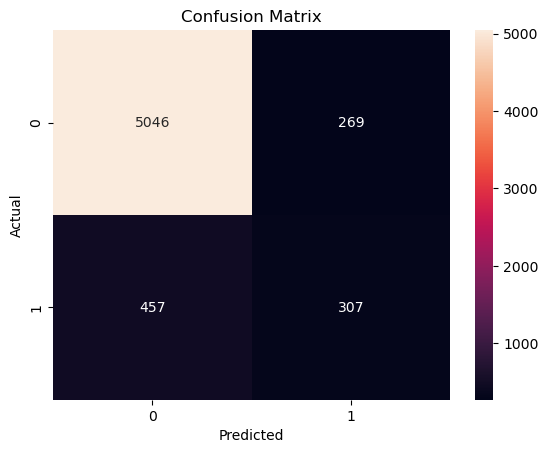

In [152]:
# # confusion matrix before modify threshold
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True,fmt='0.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


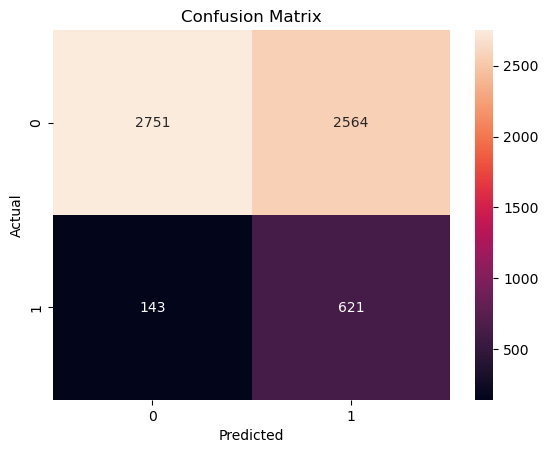

In [171]:
# confusion matrix after modify threshold
cm = confusion_matrix(y_test, y_test_thresh2)

sns.heatmap(cm, annot= True,fmt='0.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id=section13></a>
# Test Model 

In [104]:
model = pickle.load(open('model.pkl', 'rb'))

In [114]:
t_data={'age':  36,
 'job':  'admin.',
 'marital': 'married',
 'education':  'Basic education',
 'housing':  'no',
 'loan':  'no',
 'contact':  'telephone',
 'month':  'jun',
 'day_of_week':  'wed',
 'pdays':  0,
 'previous':  0,
 'emp_var_rate':  1.4,
 'cons_price_idx':  94.465,
 'cons_conf_idx':  -41.8,
 'euribor3m':  4.864,
 'nr_employed':  5228.1,
 'age_group':  '30-39'}

In [116]:
d1 = pd.DataFrame(t_data , index=[0] )
d1

age     job  marital        education housing loan    contact month  \
0   36  admin.  married  Basic education      no   no  telephone   jun   

  day_of_week  pdays  previous  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         wed      0         0           1.4          94.465          -41.8   

   euribor3m  nr_employed age_group  
0      4.864       5228.1     30-39

In [127]:
model.predict_proba(d1)[0][0]

0.9204122

In [120]:
np.argmax(model.predict_proba(d1))

0

In [123]:
model.predict_proba(d1)[np.argmax(model.predict_proba(d1))][np.argmax(model.predict_proba(d1))]

0.9204122

In [124]:
np.max(model.predict_proba(d1))

0.9204122

In [184]:
# function to predection with modify threshold
def pred(data):
    x= model.predict_proba(data)[0][0]
    if x >= 0.13 :
        print('This client will not subscribed to a term deposit') 
    else :
        print('This client will subscribed to a term deposit')
        

In [185]:
model.predict_proba(d1)[0][0]

0.9204122

In [186]:
res = model.predict_proba(d1)[0]
res

array([0.9204122 , 0.07958779], dtype=float32)

In [187]:
# prediction 
pred(d1)

This client will not subscribed to a term deposit
